In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,roc_curve,precision_recall_curve
import warnings

In [175]:
data = pd.read_csv("C:/Users/singh/Documents/creditcard.csv")


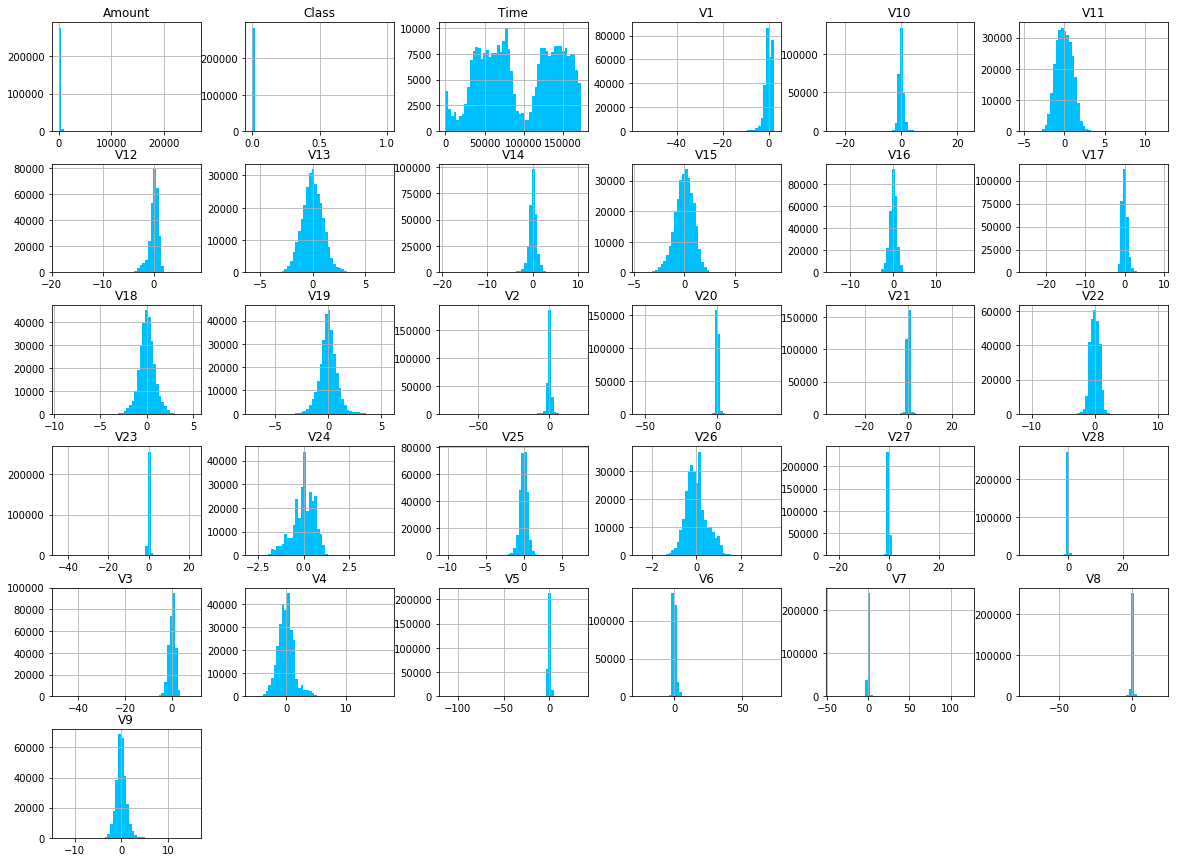

In [176]:
# Graph distribution
data.hist (bins=50, figsize=(20,15), color = 'deepskyblue')

plt.show()

In [177]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


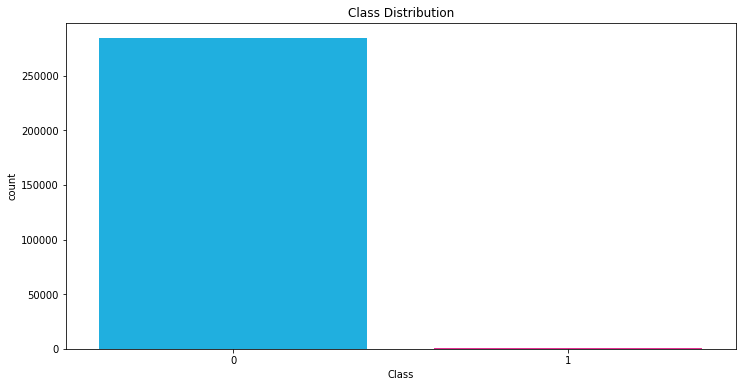

% of normal trasnsaction 99.82725143693798
Number of normal transaction 284315
% of fraud trasnsaction 0.1727485630620034
Number of fraud transaction 492


In [178]:
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))

ax= sns.countplot(x="Class",data=data,palette=my_pal)
plt.title("Class Distribution")
plt.show()

Count_Normal_transacation = len(data[data['Class']==0])
Count_Fraud_transacation = len(data[data['Class']==1])

Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)*100
print("% of normal trasnsaction",Percentage_of_Normal_transacation)
print("Number of normal transaction",Count_Normal_transacation)
Percentage_of_fraud_transacation = Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)*100
print("% of fraud trasnsaction",Percentage_of_fraud_transacation)
print("Number of fraud transaction",Count_Fraud_transacation)

Text(0,0.5,'Number of transaction')

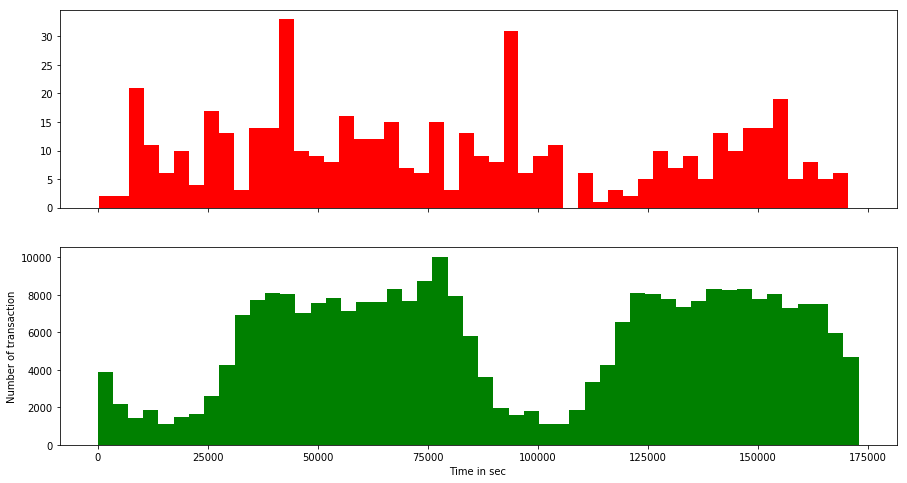

In [179]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,8))

bins=50

ax1.hist(data.Time[data.Class == 1],bins=50,color='red')
ax2.hist(data.Time[data.Class==0],bins=50,color='green')

plt.xlabel('Time in sec')
plt.ylabel('Number of transaction')

Text(0,0.5,'Amount')

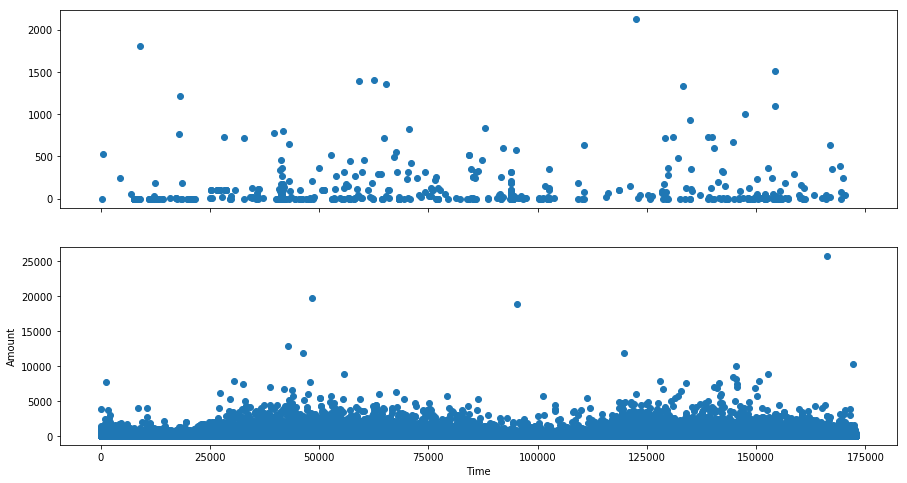

In [180]:
#time vs amount vs class
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1.scatter(data.Time[data.Class==1],data.Amount[data.Class==1])
ax2.scatter(data.Time[data.Class==0],data.Amount[data.Class==0])

plt.xlabel("Time")
plt.ylabel("Amount")


Text(0.5,1,'Boxplot Amount vs Class')

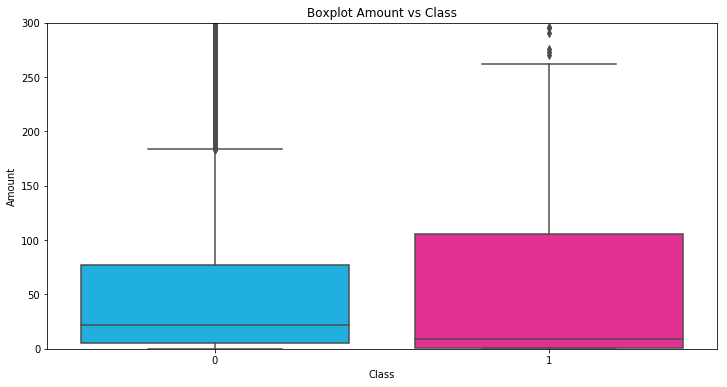

In [181]:
#boxplot Amount vs Class
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='Class',y='Amount',data=data,palette=my_pal)
ax.set_ylim([0,300])
plt.title('Boxplot Amount vs Class')

Text(0.5,1,'Normal')

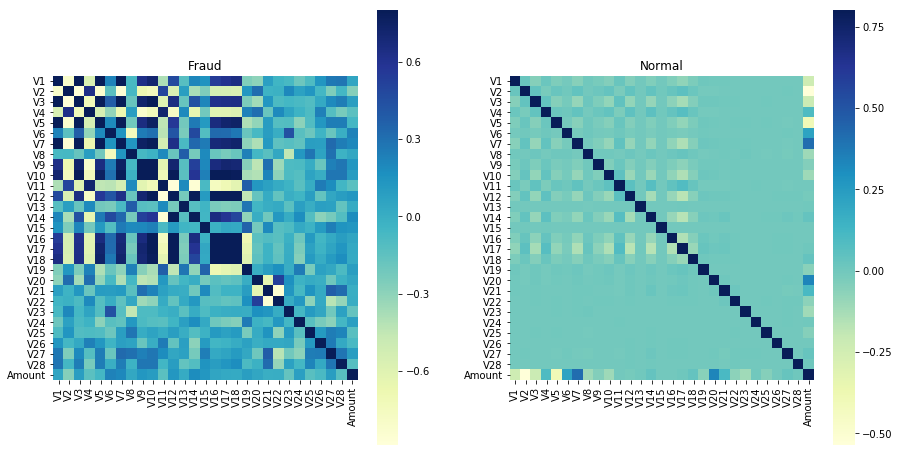

In [182]:
#correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =( 15, 8))

sns.heatmap(data.query('Class==1').drop(["Class","Time"],1).corr(),vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(data.query('Class==0').drop(["Class","Time"],1).corr(),vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu')
ax2.set_title('Normal')


In [183]:
# Cut in 2 datasets, one for training & test, other for validation
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split (data, test_size = 0.1, random_state = 42)

In [184]:
# Reassign dataset names
data = train_set
valid_data = test_set

In [185]:
# Normalization Amount
from sklearn.preprocessing import StandardScaler
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

Text(0.5,1,'After normalization')

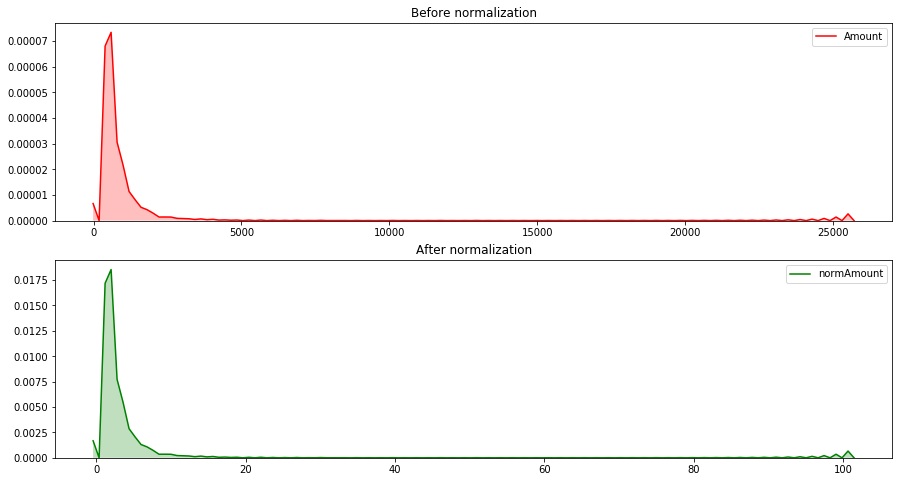

In [186]:
f,(ax1,ax2) =plt.subplots(2,1,figsize=(15,8))

sns.kdeplot(data['Amount'],shade=True,ax=ax1,color="Red")
ax1.set_title("Before normalization")

sns.kdeplot(data["normAmount"],shade=True,ax=ax2,color="green")
ax2.set_title("After normalization")



In [187]:
#drop useless variable
data=data.drop(['Amount','Time'],axis=1)


In [188]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
count,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,...,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,256326.000000,2.563260e+05
mean,0.000787,0.000279,-0.000545,-0.000420,0.000217,0.000337,0.000506,0.000020,0.000775,-0.000852,...,0.000328,-0.000705,0.000241,0.000222,-0.000728,-0.000560,-0.000321,0.000216,0.001740,-3.935153e-16
std,1.956494,1.648986,1.514006,1.415594,1.381680,1.333873,1.239372,1.192610,1.097865,1.086855,...,0.736526,0.725983,0.626604,0.605236,0.521304,0.482247,0.402277,0.329320,0.041677,1.000002e+00
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,-3.501836e-01
25%,-0.920249,-0.598404,-0.890516,-0.848857,-0.690771,-0.768232,-0.552928,-0.208079,-0.642234,-0.535786,...,-0.228425,-0.542797,-0.161585,-0.354460,-0.317659,-0.327408,-0.070740,-0.052946,0.000000,-3.281995e-01
50%,0.018564,0.065501,0.179232,-0.019309,-0.054395,-0.274532,0.040901,0.022482,-0.050994,-0.093601,...,-0.029573,0.005660,-0.010801,0.040838,0.015092,-0.052788,0.001470,0.011339,0.000000,-2.630397e-01
75%,1.315616,0.804021,1.025290,0.743958,0.611975,0.398376,0.569886,0.327616,0.597900,0.452858,...,0.186277,0.528637,0.147998,0.439788,0.350571,0.240183,0.091141,0.078325,0.000000,-4.454612e-02
max,2.454930,22.057729,4.226108,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,15.245686,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,1.014147e+02


In [189]:
# def X and Y
y = np.array(data.Class.tolist())
data = data.drop('Class', 1)
X = np.array(data.as_matrix())









In [190]:
# Stratified k-folds
skf= StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
for train_index,test_index in skf.split(X,y):
    X_train,y_train=X[train_index],y[train_index]
    X_test,y_test=X[test_index],y[test_index]

In [191]:
# confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [192]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [193]:
# precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [194]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

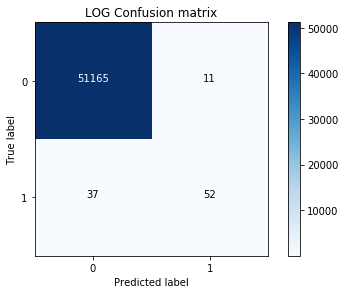

Precision =     0.825
Recall    =     0.584
F1_score  =     0.684


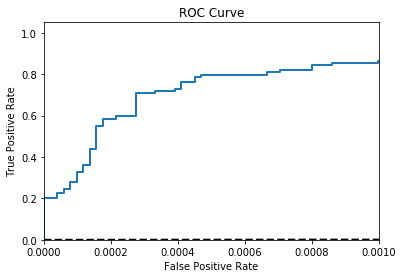

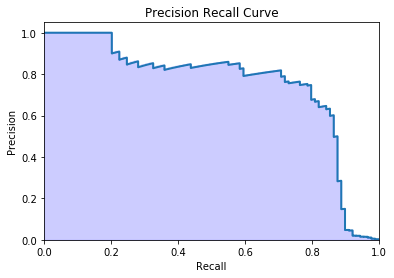

In [195]:
##Logistic regression

log_cfl = LogisticRegression()
log_cfl.fit(X_train,y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'LOG Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

In [196]:
# Show parameters currently use
from pprint import pprint
print('Parameters currently in use:\n')
pprint(log_cfl.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [197]:
finding best parameters 
from sklearn.model_selection import GridSearchCV
param_grid = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.1, 1, 10, 100]
            }
CV_log_cfl = GridSearchCV(estimator = log_cfl, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_cfl.fit(X_train, y_train)
best_parameters = CV_log_cfl.best_params_
print('The best parameters for using this model is', best_parameters)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.5min finished


The best parameters for using this model is {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1'}


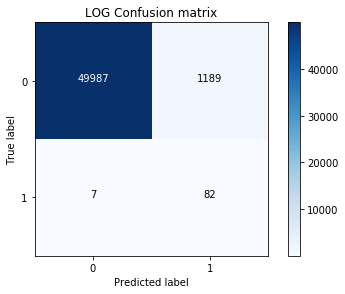

Precision =     0.065
Recall    =     0.921
F1_score  =     0.121


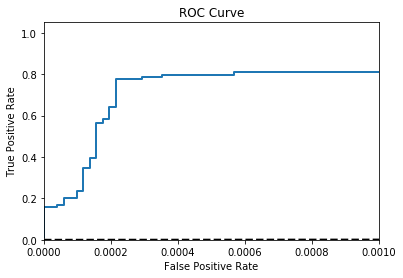

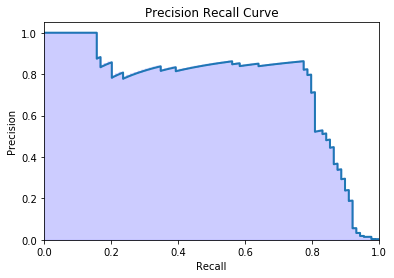

In [198]:
#Logistic regression with the best parameters
log_cfl = LogisticRegression(C = best_parameters['C'], 
                             penalty = best_parameters['penalty'], 
                             class_weight = best_parameters['class_weight'])

log_cfl.fit(X_train, y_train)
y_pred = log_cfl.predict(X_test)
y_score = log_cfl.decision_function(X_test)


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='LOG Confusion matrix')

plt.savefig('4.log_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_log, tpr_log, t_log = fpr, tpr, t
precision_log, recall_log, thresholds_log = precision, recall, thresholds



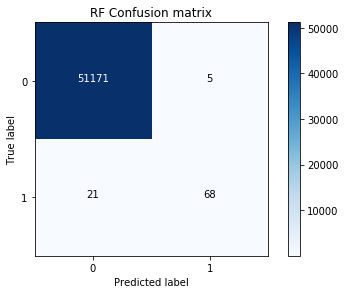

Precision =     0.932
Recall    =     0.764
F1_score  =     0.840


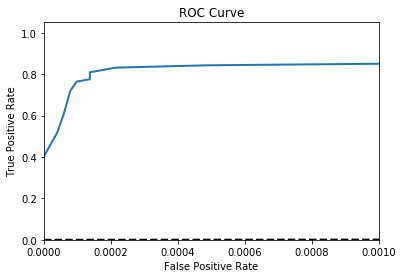

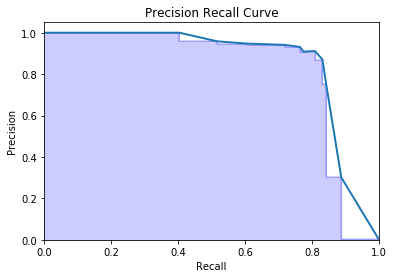

In [199]:
# Random Forest CLassifier 

rf_cfl =RandomForestClassifier(n_jobs= -1, random_state= 42)
rf_cfl.fit(X_train,y_train)
y_pred= y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()


In [200]:
#from sklearn.model_selection import GridSearchCV

#param_grid={
 #   'n_estimators': [100, 200, 500],
 #   'max_features': [2, 3],
 #   'min_samples_leaf': [1, 2, 4],
 #   'min_samples_split': [2, 5, 10]
#}

#CV_rnd_cfl = GridSearchCV(estimator = rf_cfl, param_grid = param_grid, scoring = 'f1', verbose = 10, n_jobs = -1)
#CV_rnd_cfl.fit(X_train, y_train)

#best_parameters = CV_rf_cfl.best_params_
#print("The best parameters for using this model is", best_parameters)

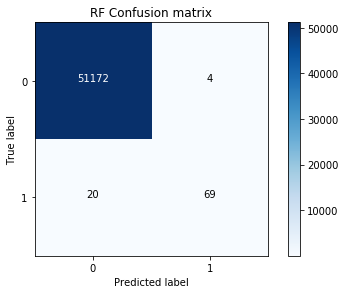

Precision =     0.945
Recall    =     0.775
F1_score  =     0.852


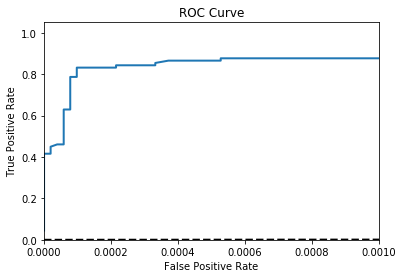

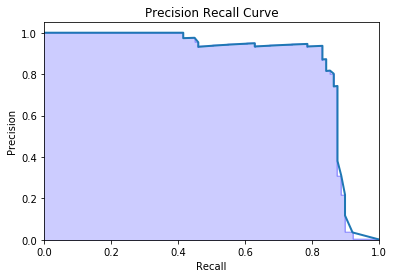

In [201]:
# Ramdom forest Classifier
rf_cfl = RandomForestClassifier(n_estimators = 200, 
                                 max_features = 3, 
                                 min_samples_leaf = 1, 
                                 min_samples_split = 2, 
                                 n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(X_train, y_train)
y_pred = rf_cfl.predict(X_test)
y_score = rf_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'RF Confusion matrix')
plt.savefig('3.rf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_rf, tpr_rf, t_rf = fpr, tpr, t
precision_rf, recall_rf, thresholds_rf = precision, recall, thresholds

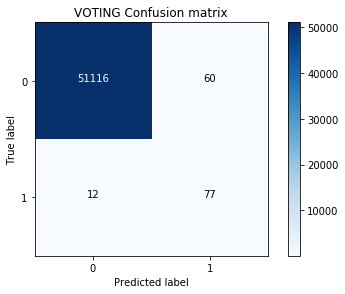

Precision =     0.562
Recall    =     0.865
F1_score  =     0.681


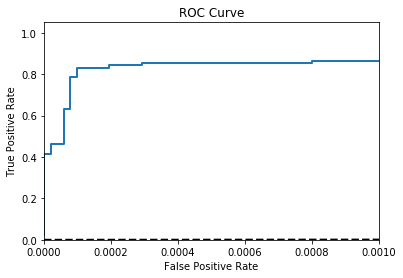

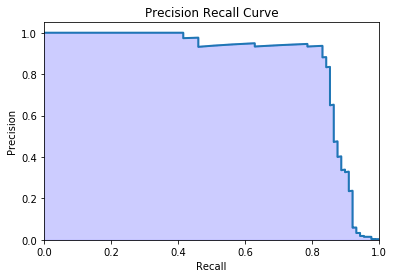

In [202]:
#Voting Classifier
voting_cfl = VotingClassifier (
        estimators = [('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [1, 1])
    
voting_cfl.fit(X_train,y_train)

y_pred = voting_cfl.predict(X_test)
y_score = voting_cfl.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING Confusion matrix')
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds

In [203]:
pr = 0.937
rec = 0.831
t = 0.5

In [204]:
# Precision-recall-threshold curve : 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(16, 12))
    plt.title('Precision and Recall Scores (decision threshold)')
    plt.plot(thresholds, precisions[:-1], 'b-',linewidth=2, label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g', linewidth=2, label='Recall')
    plt.axvline(t, color='k', linestyle='--', label='Threshold')
    plt.axhline(pr, color='blue', linewidth=2, linestyle='--')
    plt.axhline(rec, color='green', linewidth=2, linestyle='--')
    plt.ylabel('Score')
    plt.xlabel('Decision Threshold')
    plt.legend(loc='best')
    plt.savefig('5.prec_recc_threshold.png')
    plt.show();

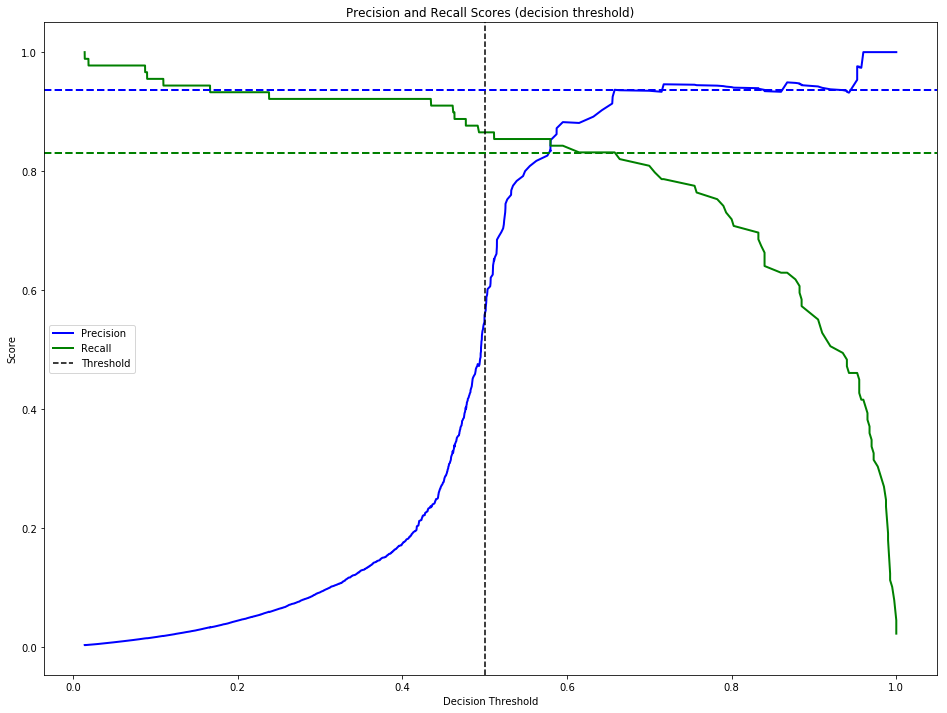

In [205]:
plot_precision_recall_vs_threshold(precision, recall, thresholds)

In [206]:
def roc_curve_all_models () : 
    plt.figure(figsize=(16, 12))
    plt.plot(fpr_rf, tpr_rf, label = 'ROC curve', linewidth = 2)
 #   plt.plot(fpr_xgb, tpr_xgb, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_log, tpr_log, label = 'ROC curve', linewidth = 2)
    plt.plot(fpr_voting, tpr_voting, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(['Rnd', 'Log', 'Voting'], loc='upper left')
    plt.savefig('6.roc.png')
    plt.show();

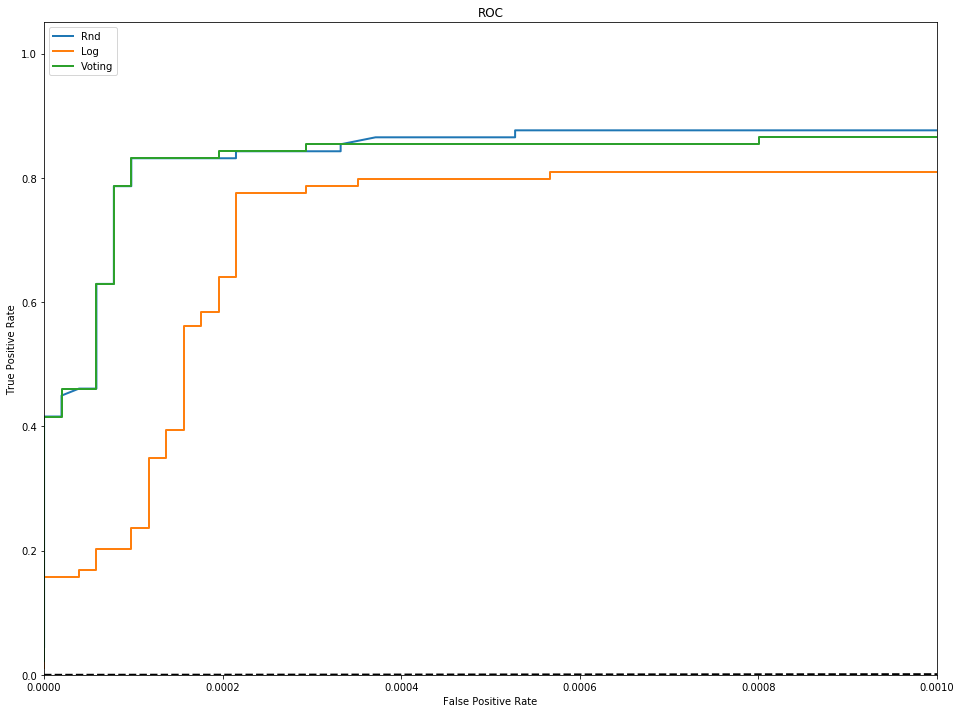

In [207]:
roc_curve_all_models ()

In [208]:
def prec_recall_all_models () :
    plt.figure(figsize=(16, 12))
    plt.plot(recall_rf, precision_rf, linewidth = 2)
   # plt.plot(recall_xgb, precision_xgb, linewidth = 2)
    plt.plot(recall_log, precision_log, linewidth = 2)
    plt.plot(recall_voting, precision_voting, linewidth = 2)
    plt.scatter(rec, pr, linewidth = 2, color = 'red')
    plt.axvline(rec, color = 'red', linewidth = 1, linestyle='--')
    plt.axhline(pr, color = 'red', linewidth = 1, linestyle='--')
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve - PR = 0.937 - REC = 0.831 - F1 = 881 ')
    plt.legend(['Rnd', 'Log', 'Voting'], loc='upper right')
    plt.savefig('7.prec_recc.png')
    plt.show();

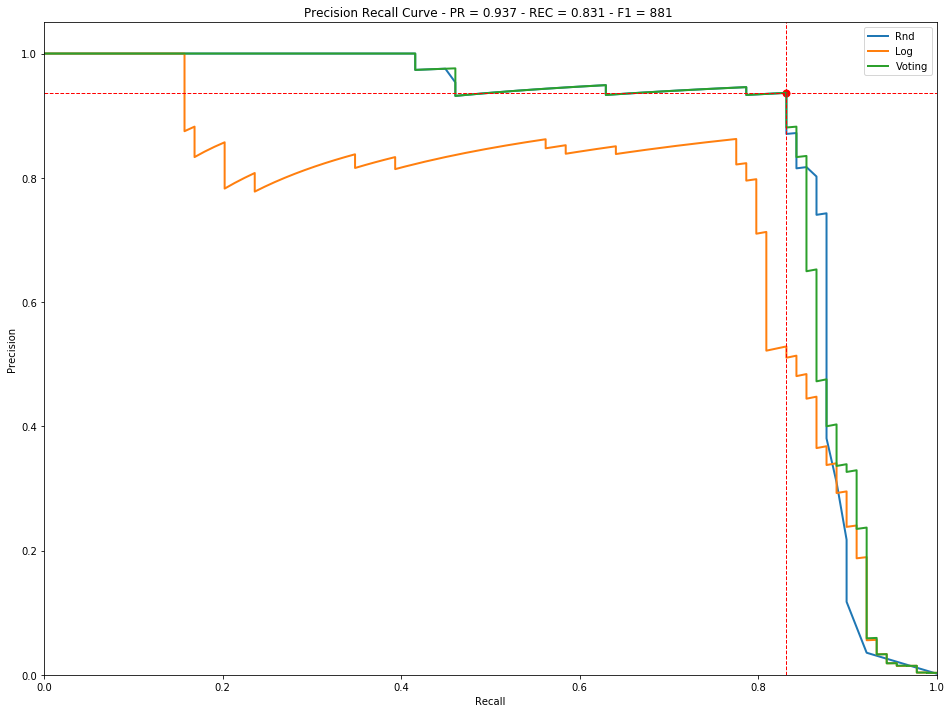

In [209]:
prec_recall_all_models () 

In [210]:
# Normalize amount in valid_data 'normAmount' 
from sklearn.preprocessing import StandardScaler
valid_data['normAmount'] = StandardScaler().fit_transform(valid_data['Amount'].values.reshape(-1,1))

In [211]:
# Drop time and amount in valid_data
valid_data = valid_data.drop(['Amount','Time'],axis=1)

In [212]:
# Define X & y
y = np.array(valid_data.Class.tolist())
valid_data = valid_data.drop('Class', 1)
X = np.array(valid_data.as_matrix())

In [213]:
# Apply voting_classifier, previously trained, on valid_data : 
y_pred = voting_cfl.predict(X)
y_score = voting_cfl.predict_proba(X)[:,1]

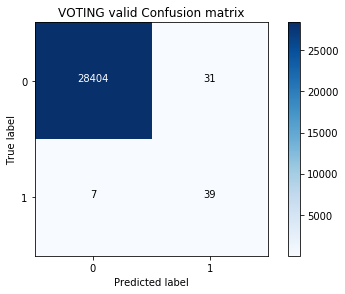

Precision =     0.557
Recall    =     0.848
F1_score  =     0.672


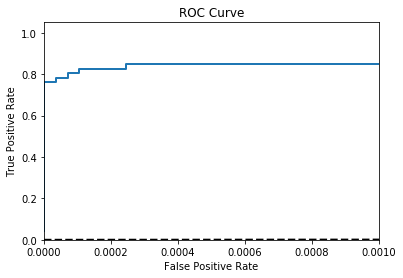

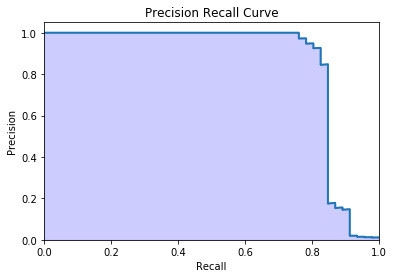

In [214]:
# Metrics valid_data
# Confusion Matrix 
cm = confusion_matrix(y, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING valid Confusion matrix')
plt.savefig('8.votingvf_cfl_confusion_matrix.png')
plt.show()

show_metrics()

#ROC
fpr, tpr, t = roc_curve(y, y_score)
plot_roc()

#precision recall
precision, recall, thresholds = precision_recall_curve(y, y_score)
plot_precision_recall()

F1_score w/ threshold = 0.1 : 0.029014177382129903
F1_score w/ threshold = 0.2 : 0.0695940347970174
F1_score w/ threshold = 0.3 : 0.14046822742474915
F1_score w/ threshold = 0.4 : 0.2537764350453172
F1_score w/ threshold = 0.5 : 0.6724137931034483
F1_score w/ threshold = 0.6 : 0.8444444444444444
F1_score w/ threshold = 0.7 : 0.8571428571428571
F1_score w/ threshold = 0.8 : 0.85
F1_score w/ threshold = 0.9 : 0.7733333333333333


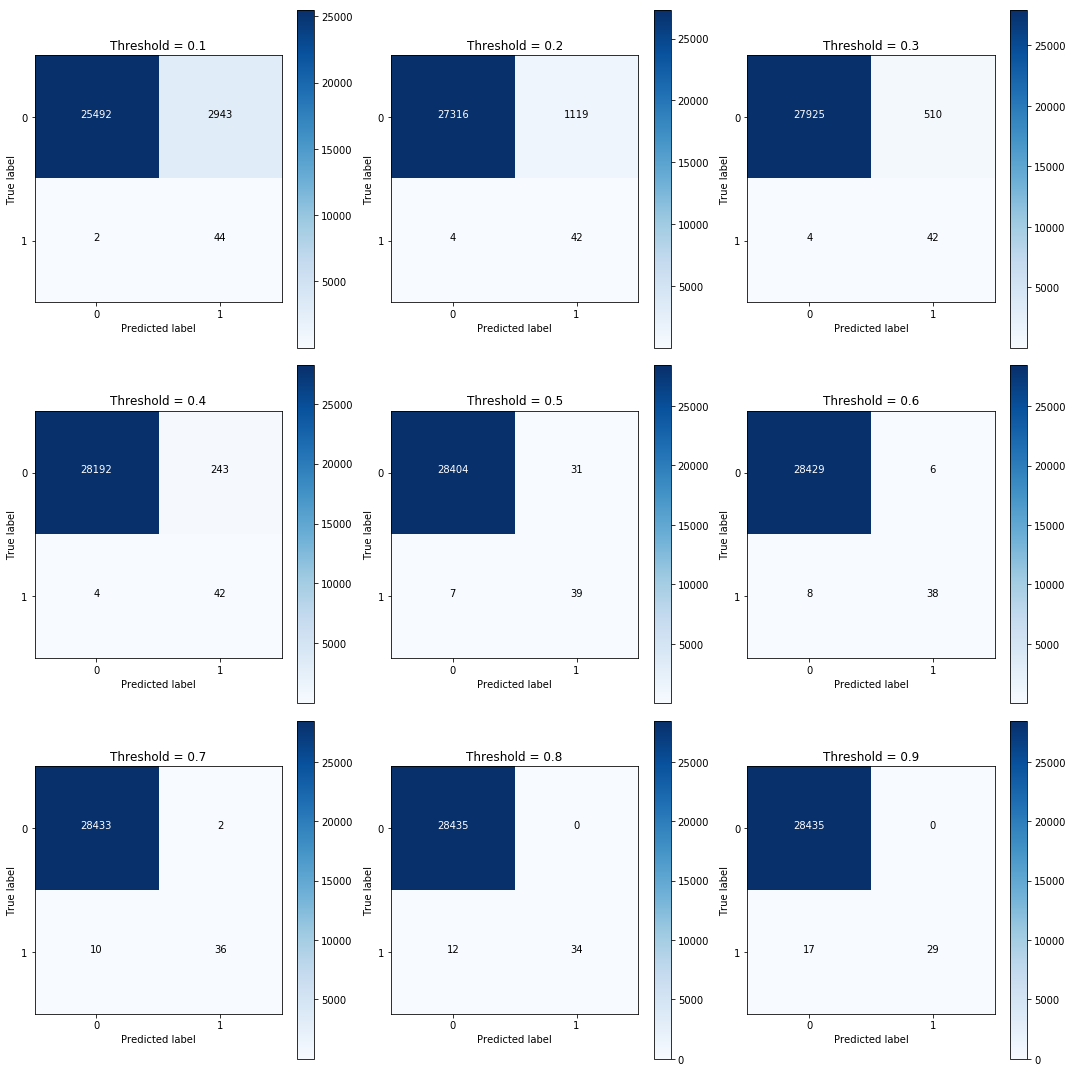

In [215]:
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_cfl.predict_proba(X)[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('F1_score w/ threshold = %s :'%i, (2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 
    
plt.savefig('9.confusion_matrix_thresold_select.png')